# Luminosity plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load in data
tbl = pd.read_csv('FSRED Mags - Final_python.csv')
# group = tbl.groupby(['Source', 'Date obs', 'Filter'])[''.mean()
# print(len(group))
# print(len(tbl))
display(tbl.head())

# TODO combine bands where needed

,Source,Filter,Obs_number,Detected Name,Date obs,RA,DEC,Error_circle (arcsec),Position_source,nH,...,D_errup,D_errlow,Distance_source,Lum,Lum_err,Xray_Flux (erg/s/cm2),Xray_errup,Xray_errlow,Xray_Flux_source,Comments
0,RX_J1735.3-3540,J,3081,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",5.760000e+21,...,NaN,NaN,Degenaar+2010,NaN,NaN,2.000000e-11,5.000000e-12,5.000000e-12,Thesis Bilal 2018,NaN
1,RX_J1735.3-3540,J,3090,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",5.760000e+21,...,NaN,NaN,Degenaar+2010,NaN,NaN,2.000000e-11,5.000000e-12,5.000000e-12,Thesis Bilal 2018,NaN
2,RX_J1735.3-3540,H,3063,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",5.760000e+21,...,NaN,NaN,Degenaar+2010,NaN,NaN,2.000000e-11,5.000000e-12,5.000000e-12,Thesis Bilal 2018,Initially very large magnitude offset but seem...
3,RX_J1735.3-3540,H,3072,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",5.760000e+21,...,NaN,NaN,Degenaar+2010,NaN,NaN,2.000000e-11,5.000000e-12,5.000000e-12,Thesis Bilal 2018,Initially large magnitude offset but seems oka...
4,RX_J1735.3-3540,Ks,3045,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",5.760000e+21,...,NaN,NaN,Degenaar+2010,NaN,NaN,2.000000e-11,5.000000e-12,5.000000e-12,Thesis Bilal 2018,Initially large magnitude offset but seems oka...


In [3]:
# TODO determine luminosities based on flux and distance
def luminosity(flux, d):
    d_cm = 3.08567758128e21 * float(d) 
    L = 4 * np.pi * d_cm**2 * flux
    
    return L

def luminosity_error(flux, flux_error, d, d_error, L):
    # TODO
#     d_cm = 3.08567758128e21 * float(d) 
#     d_err_cm = 3.08567758128e21 * float(d_error) 
#     print( np.pi * np.sqrt((flux_error/flux)**2 + 2*(d_error/float(d))**2))
    L_err = np.sqrt((flux_error/flux)**2 + 2*(d_error/float(d))**2) * L # TODO dubbelcheck

    return L_err

def calc_flux(upplim, band):
    """ 
    Calculate flux density based on AB magnitude system
    using     m_AB = -2.5 log10(F_nu) - 48.60 
    and       F_lamb = F_nu * c / lamb_eff
    and convert this flux density to flux. 
    """ 
    
    band = band.strip() # remove accidental whitespace     
    
    # Calculate flux density 
    if band == 'J':
        W_eff = 2214.62 # A
        l_eff = 12287.26 # A
    elif band == 'H':
        W_eff = 2769.45 # A 
        l_eff = 16039.55 # A
    elif band == 'Ks':
        W_eff = 3163.40 # A
        l_eff = 21315.89 # A

    c = 2.9979e18 # A/s

    F_nu = 10**(-(upplim+48.60)/2.5) # erg/s/cm2/Hz   
    F_lamb = F_nu * c / l_eff**2 # erg/s/cm2/A
    Flux = W_eff * F_lamb 

    return Flux

tbl['L_NIR'] = tbl.apply(lambda x: luminosity(x['Flux (erg/s/cm2)'], x['Distance (kpc)']), axis=1)
tbl['L_X'] = tbl.apply(lambda x: luminosity(x['Xray_Flux (erg/s/cm2)'], x['Distance (kpc)']), axis=1)
tbl['L_NIR_errup'] = tbl.apply(lambda x: luminosity_error(x['Flux (erg/s/cm2)'], x['Flux_err'], x['Distance (kpc)'], x['D_errup'], x['L_NIR']), axis=1)
tbl['L_NIR_errlow'] = tbl.apply(lambda x: luminosity_error(x['Flux (erg/s/cm2)'], x['Flux_err'], x['Distance (kpc)'], x['D_errlow'], x['L_NIR']), axis=1)
tbl['L_X_errup'] = tbl.apply(lambda x: luminosity_error(x['Xray_Flux (erg/s/cm2)'], x['Xray_errup'], x['Distance (kpc)'], x['D_errup'], x['L_X']), axis=1)
tbl['L_X_errlow'] = tbl.apply(lambda x: luminosity_error(x['Xray_Flux (erg/s/cm2)'], x['Xray_errlow'], x['Distance (kpc)'], x['D_errlow'], x['L_X']), axis=1)
tbl['F_NIR_upplim'] = tbl.apply(lambda x: calc_flux(x['Upper_limit'], x['Filter']), axis=1)
tbl['L_NIR_upplim'] = tbl.apply(lambda x: luminosity(x['F_NIR_upplim'], x['Distance (kpc)']), axis=1)

display(tbl.head())
# TODO how to handle upper limits in magnitude, distance and a combination of these? 
# TODO determine luminosity errors based on flux and distance errors
# TODO add luminosity + errors to paper tabel
# TODO uitzonderingen toevoegen

,Source,Filter,Obs_number,Detected Name,Date obs,RA,DEC,Error_circle (arcsec),Position_source,nH,...,Xray_Flux_source,Comments,L_NIR,L_X,L_NIR_errup,L_NIR_errlow,L_X_errup,L_X_errlow,F_NIR_upplim,L_NIR_upplim
0,RX_J1735.3-3540,J,3081,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",5.760000e+21,...,Thesis Bilal 2018,NaN,3.196317e+34,2.159674e+35,NaN,NaN,NaN,NaN,NaN,NaN
1,RX_J1735.3-3540,J,3090,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",5.760000e+21,...,Thesis Bilal 2018,NaN,3.055938e+34,2.159674e+35,NaN,NaN,NaN,NaN,NaN,NaN
2,RX_J1735.3-3540,H,3063,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",5.760000e+21,...,Thesis Bilal 2018,Initially very large magnitude offset but seem...,4.589307e+34,2.159674e+35,NaN,NaN,NaN,NaN,NaN,NaN
3,RX_J1735.3-3540,H,3072,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",5.760000e+21,...,Thesis Bilal 2018,Initially large magnitude offset but seems oka...,5.334394e+34,2.159674e+35,NaN,NaN,NaN,NaN,NaN,NaN
4,RX_J1735.3-3540,Ks,3045,S,2014-05-07,17 35 23.75,-35 40 16.1,0.56,"Israel+2008, UVOT",5.760000e+21,...,Thesis Bilal 2018,Initially large magnitude offset but seems oka...,4.168170e+34,2.159674e+35,NaN,NaN,NaN,NaN,NaN,NaN


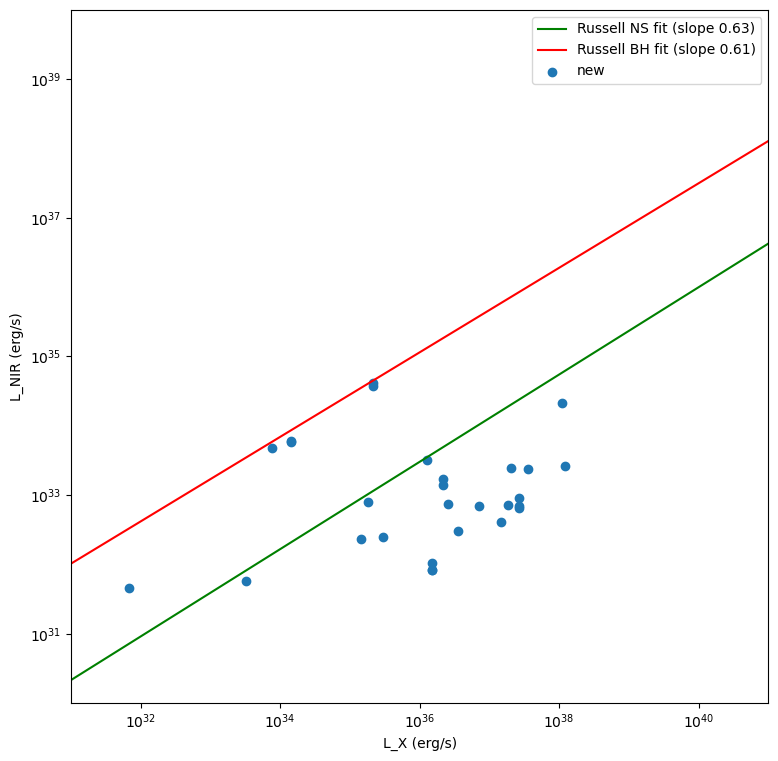

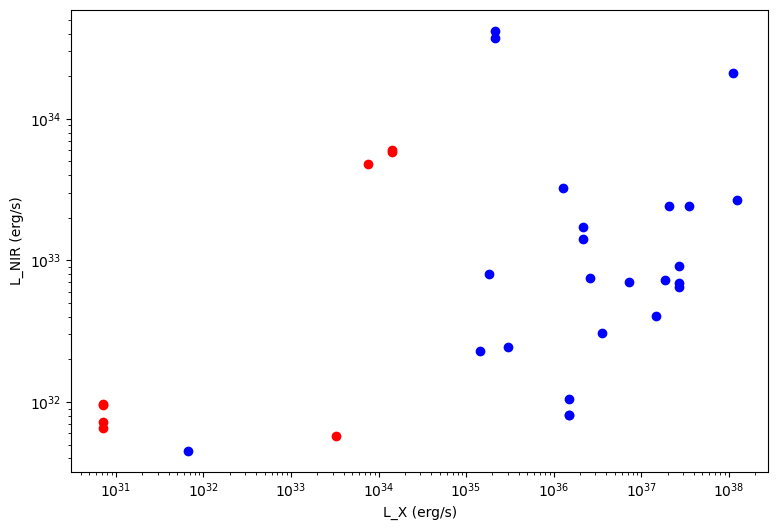

In [4]:
states = pd.read_csv('FSRED Mags - total_source_list.csv')
quiescent_sources = states[states['Hard/soft state ']=='quiescence']['Source'].to_list()

tbl = tbl[tbl['Filter']=='Ks'] # TODO


fig, ax = plt.subplots(figsize = (9, 9))
xrange= np.logspace(29, 41, num=10)
y = 10**10.8 * xrange**(0.63)
ax.plot(xrange, y, c='g', label='Russell NS fit (slope 0.63)')
y_bh = 10**13.1 * xrange**0.61
ax.plot(xrange, y_bh, c='r', label='Russell BH fit (slope 0.61)')

ax.scatter(tbl['L_X'], tbl['L_NIR'], label='new')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L_X (erg/s)')
ax.set_ylabel('L_NIR (erg/s)')
ax.set_xlim(10e30, 10e40)
ax.set_ylim(10e29, 10e39)
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize = (9, 6))

for n, r in tbl.iterrows():
    s = r['Source']
    if s in quiescent_sources: 
        c = 'Red'
    else:
        c = 'Blue'
#     plt.scatter(ratio_list[n], source_list[n], color=c, zorder=10)
    ax.scatter(tbl['L_X'][n], tbl['L_NIR'][n], color=c)  
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L_X (erg/s)')
ax.set_ylabel('L_NIR (erg/s)')
# ax.set_xlim(10e30, 10e40)
# ax.set_ylim(10e29, 10e39)
plt.show()


In [5]:
tbl_upplims = tbl[tbl['L_NIR_upplim'].notnull()]
display(tbl_upplims)

,Source,Filter,Obs_number,Detected Name,Date obs,RA,DEC,Error_circle (arcsec),Position_source,nH,...,Xray_Flux_source,Comments,L_NIR,L_X,L_NIR_errup,L_NIR_errlow,L_X_errup,L_X_errlow,F_NIR_upplim,L_NIR_upplim
12,XTE_J1719-291,Ks,704,NaN,2013-06-18,17 19 17.18,-29 04 10.0,0.20,"Greiner+2008, Chandra",3.010000e+21,...,NaN,"Distortion does not look amazing, see finding ...",NaN,NaN,NaN,NaN,NaN,NaN,2.994561e-14,2.293106e+32
23,EXO_0748-676,Ks,3095,NaN,2018-11-13,07 48 33.70944,-67 45 07.722,0.20,"Monet+2003, PMM",8.970000e+20,...,Thesis Bilal 2018,Did astronomy with GDR3 sources within 5' inst...,NaN,3.276004e+33,NaN,NaN,1.132871e+33,1.132871e+33,4.900581e-15,3.210864e+31
37,IGR_J17494-3030,Ks,3162,NaN,2014-05-08,17 49 23.61,-30 29 59.1,0.15,"van den Eijnden+2020, VLA",6.720000e+21,...,NaN,Used low_lim = 12 for magnitude calibration be...,NaN,NaN,NaN,NaN,NaN,NaN,2.059065e-13,1.576743e+33
106,RXS_J171824.2-402934,Ks,246,S,2013-06-17,17 18 24.144,-40 29 33.04,0.60,"t Zand+2005, Chandra",6.680000e+21,...,Thesis Bilal 2018,Applied PSF but did not return error,2.287220e+32,1.453742e+35,NaN,NaN,NaN,NaN,3.693551e-14,3.579646e+32
109,Swift_J1922.7-1716,Ks,296,NaN,2013-06-17,19 22 37.00,-17 17 1.1,0.61,"Barthelmy+2011, UVOT",7.380000e+20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.401643e-15,1.489084e+31
115,MAXI_J1421-613,Ks,3675,NaN,2014-05-10,14 21 37.2,-61 36 25.4,0.30,"Coriat+2014, ACTA",1.660000e+22,...,NaN,2 other sources within XRT error circle but no...,NaN,NaN,NaN,NaN,NaN,NaN,3.661139e-14,3.942482e+31
120,XTE_J1728-295,Ks,3784,NaN,2014-05-10,17 28 38.853,-29 21 43.181,0.15,"Van den Eijnden+2019, VLA",4.490000e+21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.694076e-14,5.126035e+32
121,XTE_J1901+014,Ks,3803,NaN,2014-05-10,19 1 40.2,1 26 26.5,0.64,"Karasev+2012, Chandra",8.490000e+21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.328788e-14,1.017528e+32


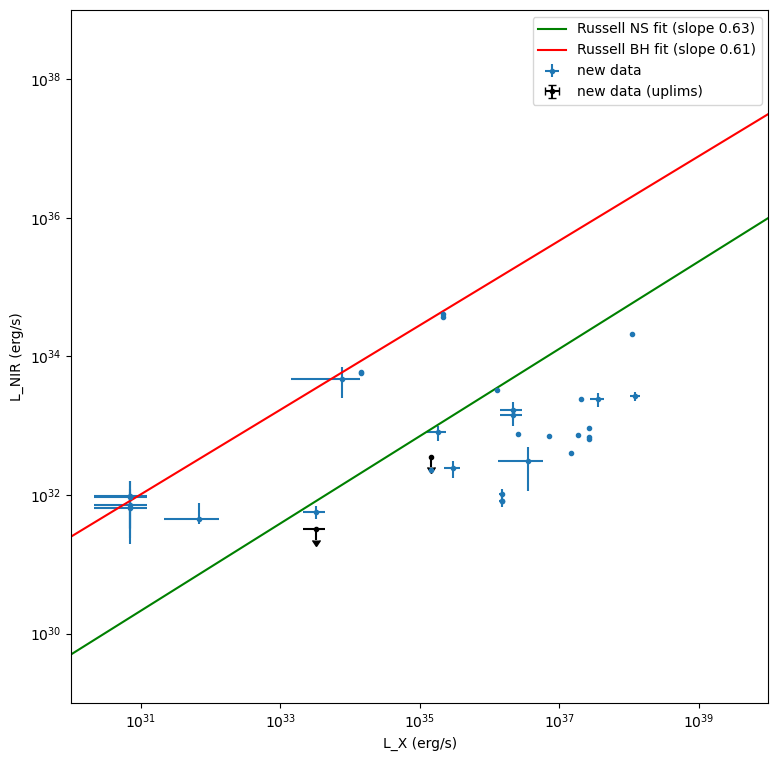

In [6]:
fig, ax = plt.subplots(figsize = (9, 9))
xrange= np.logspace(29, 41, num=10)
y = 10**10.8 * xrange**(0.63)
ax.plot(xrange, y, c='g', label='Russell NS fit (slope 0.63)')
y_bh = 10**13.1 * xrange**0.61
ax.plot(xrange, y_bh, c='r', label='Russell BH fit (slope 0.61)')

# TODO upper limits toevoegen
ax.errorbar(tbl['L_X'], tbl['L_NIR'], yerr=[tbl['L_NIR_errlow'], tbl['L_NIR_errup']], xerr=[tbl['L_X_errlow'], tbl['L_X_errup']], label='new data', fmt='o', ms=3)
ax.errorbar(tbl_upplims['L_X'], tbl_upplims['L_NIR_upplim'], yerr=tbl_upplims['L_NIR_upplim']*0.3, xerr=[tbl_upplims['L_X_errlow'], tbl_upplims['L_X_errup']], uplims =[True for i in range(len(tbl_upplims))], fmt='o', ms=3, color='k', label='new data (uplims)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L_X (erg/s)')
ax.set_ylabel('L_NIR (erg/s)')
ax.set_xlim(10e29, 10e39)
ax.set_ylim(10e28, 10e38)

# for i, row in tbl.iterrows():
#     ax.annotate(row['Source'], (tbl['L_X'][i], tbl['L_NIR'][i]))

plt.legend()
plt.show()

# TODO Add nice labels for sources

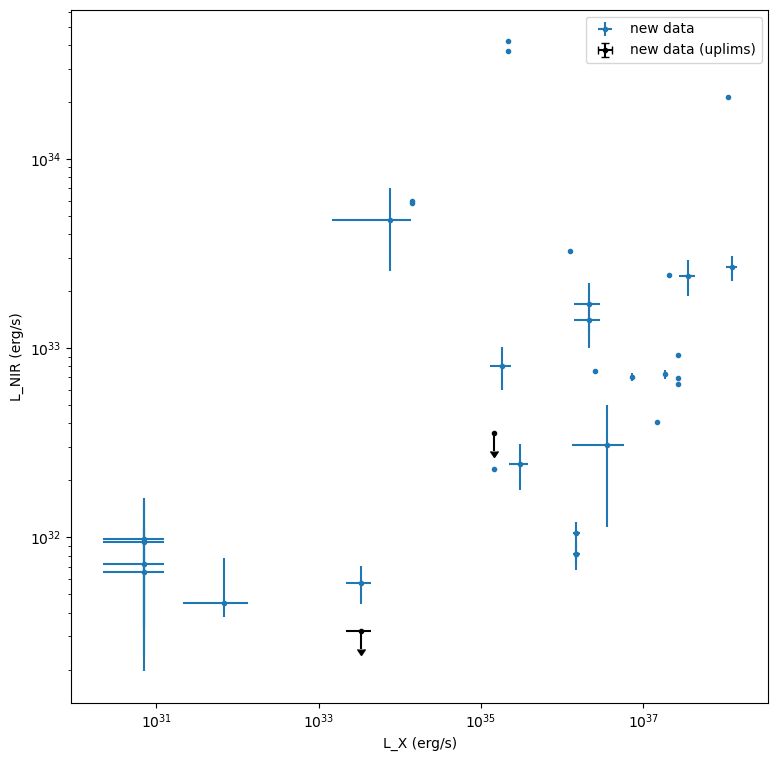

In [7]:
fig, ax = plt.subplots(figsize = (9, 9))
# xrange= np.logspace(29, 41, num=10)
# y = 10**10.8 * xrange**(0.63)
# ax.plot(xrange, y, c='g', label='Russell NS fit (slope 0.63)')
# y_bh = 10**13.1 * xrange**0.61
# ax.plot(xrange, y_bh, c='r', label='Russell BH fit (slope 0.61)')

# TODO upper limits toevoegen
ax.errorbar(tbl['L_X'], tbl['L_NIR'], yerr=[tbl['L_NIR_errlow'], tbl['L_NIR_errup']], xerr=[tbl['L_X_errlow'], tbl['L_X_errup']], label='new data', fmt='o', ms=3)
ax.errorbar(tbl_upplims['L_X'], tbl_upplims['L_NIR_upplim'], yerr=tbl_upplims['L_NIR_upplim']*0.2, xerr=[tbl_upplims['L_X_errlow'], tbl_upplims['L_X_errup']], uplims =[True for i in range(len(tbl_upplims))], fmt='o', ms=3, color='k', label='new data (uplims)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L_X (erg/s)')
ax.set_ylabel('L_NIR (erg/s)')
# ax.set_xlim(10e29, 10e39)
# ax.set_ylim(10e28, 10e38)

# for i, row in tbl.iterrows():
#     ax.annotate(row['Source'], (tbl['L_X'][i], tbl['L_NIR'][i]))

plt.legend()
plt.show()

# TODO Add nice labels for sources

In [59]:
# TODO fit powerlaw to data?
from scipy.optimize import curve_fit

# objective function
def objective(L_x, a, b):
    return 10**a * L_x ** b


valid = ~(np.isnan(tbl['L_X']) | np.isnan(tbl['L_NIR']))
popt, _ = curve_fit(objective, tbl['L_X'][valid], tbl['L_NIR'][valid], p0=[10, 1])
print(popt)

y_fit = objective(xrange, popt[0], popt[1])


[-4.53098713  1.0129815 ]


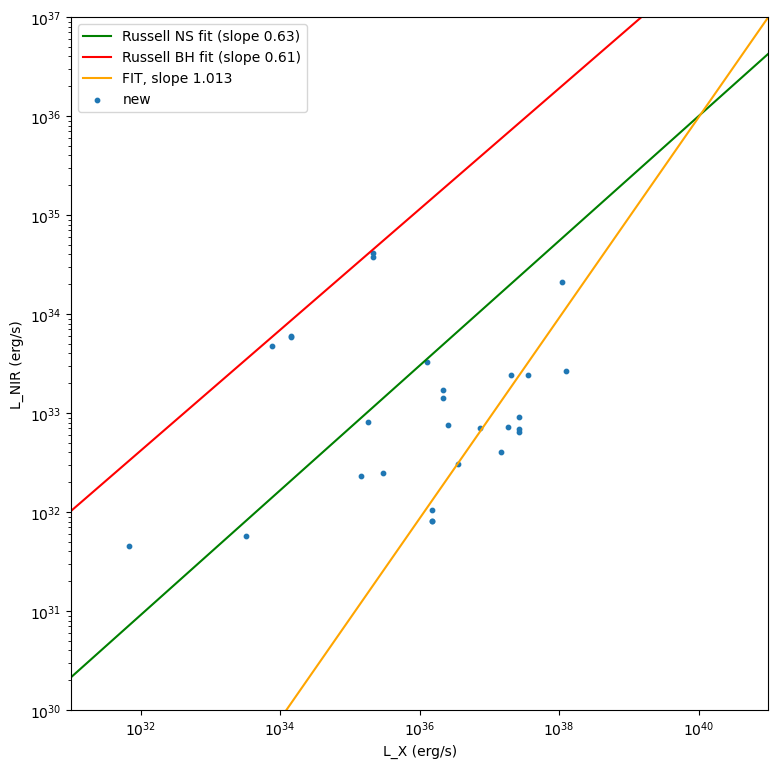

In [60]:
fig, ax = plt.subplots(figsize = (9, 9))
xrange= np.logspace(29, 41, num=10)
y = 10**10.8 * xrange**(0.63)
ax.plot(xrange, y, c='g', label='Russell NS fit (slope 0.63)')
y_bh = 10**13.1 * xrange**0.61
ax.plot(xrange, y_bh, c='r', label='Russell BH fit (slope 0.61)')
ax.plot(xrange, y_fit, c='orange', label='FIT, slope ' + str(round(popt[1], 3)))

ax.scatter(tbl['L_X'], tbl['L_NIR'], label='new', s=10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('L_X (erg/s)')
ax.set_ylabel('L_NIR (erg/s)')
ax.set_xlim(10e30, 10e40)
ax.set_ylim(10e29, 10e36)
plt.legend()
plt.show()

In [ ]:
# TODO compare powerlaw with models